# Purpose
This notebooks uses the glic library to build a completion network, and displays its architecture.

# Import

In [1]:
import os
import numpy as np
import pandas as pd

import torch
import torchvision

# Building the completion network

In [2]:
# architecture
cn_layers_params = pd.read_pickle("../lib/glcic/networks/cn_layers_params.p")
cn_layers_params

,type,kernel,dilatation,stride,inputs,outputs,batchnorm,activation
0,conv,5,1,1.0,4,64,True,ReLU
1,conv,3,1,2.0,64,128,True,ReLU
2,conv,3,1,1.0,128,128,True,ReLU
3,conv,3,1,2.0,128,256,True,ReLU
4,conv,3,1,1.0,256,256,True,ReLU
5,conv,3,1,1.0,256,256,True,ReLU
6,conv,3,2,1.0,256,256,True,ReLU
7,conv,3,4,1.0,256,256,True,ReLU
8,conv,3,8,1.0,256,256,True,ReLU
9,conv,3,16,1.0,256,256,True,ReLU


In [3]:
# create the completion network
from glcic.networks.completion_network import CompletionNetwork
cn = CompletionNetwork()

For the following vizualization, the $\verb|Graphviz|$ software must be installed.

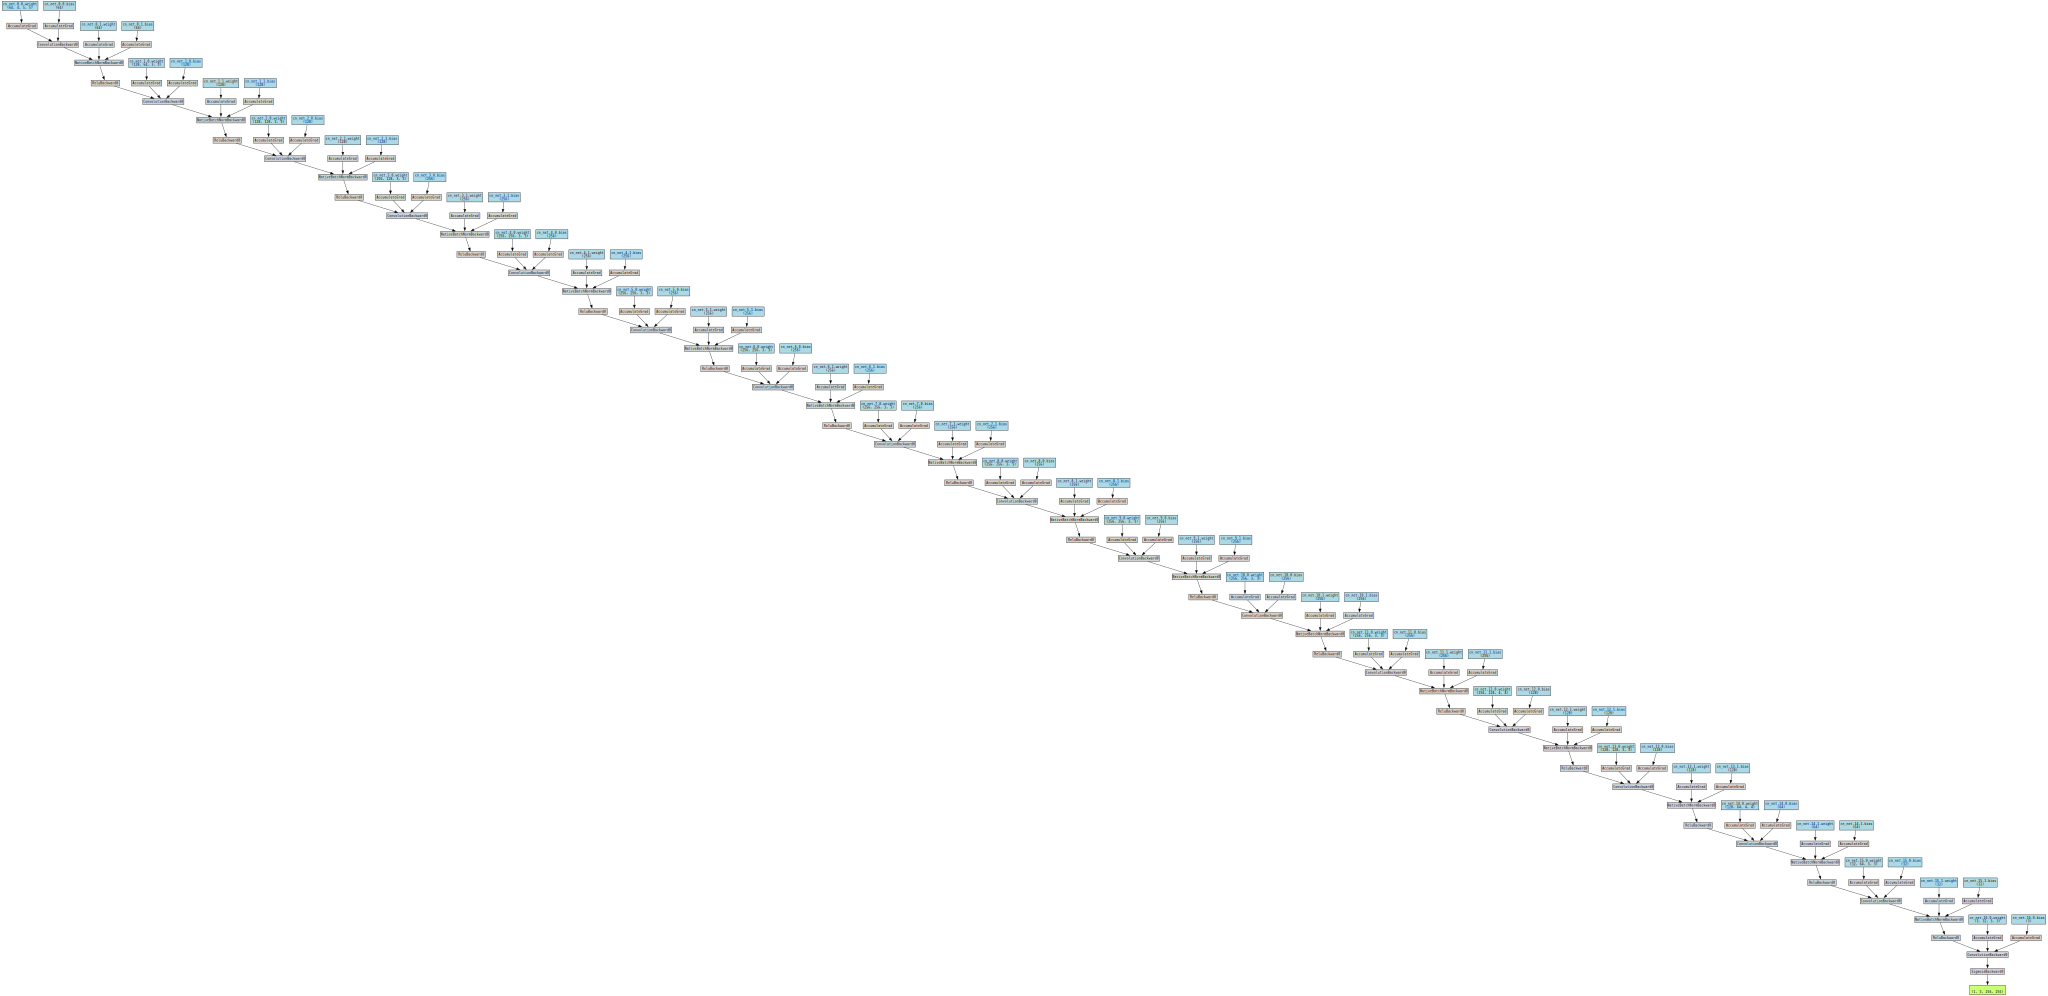

In [4]:
# vizualization
x = torch.randn(1, 4, 256, 256)
y = cn(x)
from torchviz import make_dot
make_dot(y, params=dict(cn.named_parameters()))

# Save and load

In [5]:
cn.save("../logs/models/cn")

Save: state_dict saved in ../logs/models/cn


In [6]:
cn.load("../logs/models/cn")

Load: load_state dict from ../logs/models/cn
